<h1>Analisis Data Penjualan</h1>

Import Necessary library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

read / load data

In [2]:
raw_data = pd.read_csv('all_data.csv')
raw_data.head(4)

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

<h3>Data Cleaning</h3>

Langkah pertama dalam hal ini adalah mencari tahu apa yang perlu kita bersihkan. Saya telah menemukan dalam praktik, bahwa menemukan hal-hal yang perlu dibersihkan saat melakukan operasi dan mendapatkan kesalahan.

Drop data NaN

In [3]:
#find data NaN
data_nan = raw_data[raw_data.isna().any(axis=1)]
display(data_nan)

#drop data NaN
data = raw_data.dropna(how='all')
data.head()

Order ID Product Quantity Ordered Price Each Order Date  \
1           NaN     NaN              NaN        NaN        NaN   
356         NaN     NaN              NaN        NaN        NaN   
735         NaN     NaN              NaN        NaN        NaN   
1433        NaN     NaN              NaN        NaN        NaN   
1553        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185176      NaN     NaN              NaN        NaN        NaN   
185438      NaN     NaN              NaN        NaN        NaN   
186042      NaN     NaN              NaN        NaN        NaN   
186548      NaN     NaN              NaN        NaN        NaN   
186826      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
1                   NaN  
356                 NaN  
735                 NaN  
1433                NaN  
1553                NaN  
...                 ...  
185176              NaN  
185438              NaN  
186042              NaN  
186548              NaN  
186826              NaN  

[545 rows x 6 columns]

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

Singkirkan teks di kolom tanggal pesanan

In [4]:
data = data[data['Order Date'].str[0:2] != 'Or']
data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

Parse Kolom dengan type yang benar

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [6]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


<h4>Tambah data dengan kolom tambahan</h4>

menambahkan columns month

In [8]:
data['Month'] = pd.to_datetime(data['Order Date']).dt.month
data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

Menambahkan Column City

In [9]:
def get_city(dat):
    return dat.split(',')[1].strip(" ")

def get_state(dat):
    return dat.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")
data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   

               City  
0       Dallas (TX)  
2       Boston (MA)  
3  Los Angeles (CA)  
4  Los Angeles (CA)  
5  Los Angeles (CA)

<h2>Data Explor! </h2>

Pertanyaan 1 : Apa bulan terbaik untuk penjualan? Berapa banyak yang diperoleh bulan itu?

In [10]:
data['Sales'] = data['Quantity Ordered'].astype('int') * data['Price Each'].astype('float')

In [11]:
data.groupby(['Month']).sum()

Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34

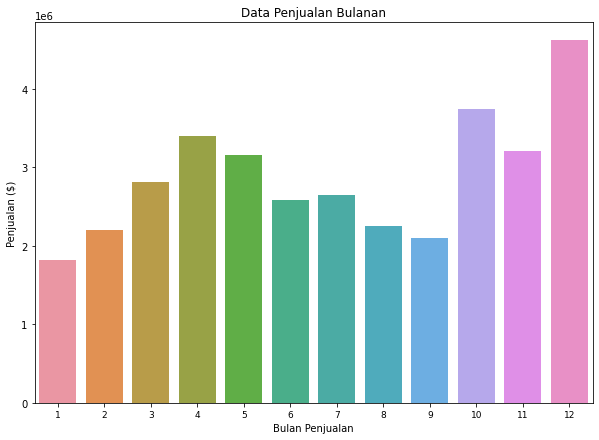

In [12]:
data_sales_month = pd.DataFrame(data.groupby('Month').sum()['Sales'].reset_index())
plt.figure(figsize=(10,7))
sns.barplot(x='Month',y='Sales',data=data_sales_month)
plt.xticks(rotation='horizontal',size=9)
plt.xlabel('Bulan Penjualan')
plt.ylabel('Penjualan ($)')
plt.title('Data Penjualan Bulanan')
plt.show()

Pertanyaan 2 : Kota Terbanyak Penjualan

In [14]:
data.groupby(['City']).sum()

Quantity Ordered  Price Each   Month       Sales
City                                                                
Atlanta (GA)                   16602  2779908.20  104794  2795498.58
Austin (TX)                    11153  1809873.61   69829  1819581.75
Boston (MA)                    22528  3637409.77  141112  3661642.01
Dallas (TX)                    16730  2752627.82  104620  2767975.40
Los Angeles (CA)               33289  5421435.23  208325  5452570.80
New York City (NY)             27932  4635370.83  175741  4664317.43
Portland (ME)                   2750   447189.25   17144   449758.27
Portland (OR)                  11303  1860558.22   70621  1870732.34
San Francisco (CA)             50239  8211461.74  315520  8262203.91
Seattle (WA)                   16553  2733296.01  104941  2747755.48

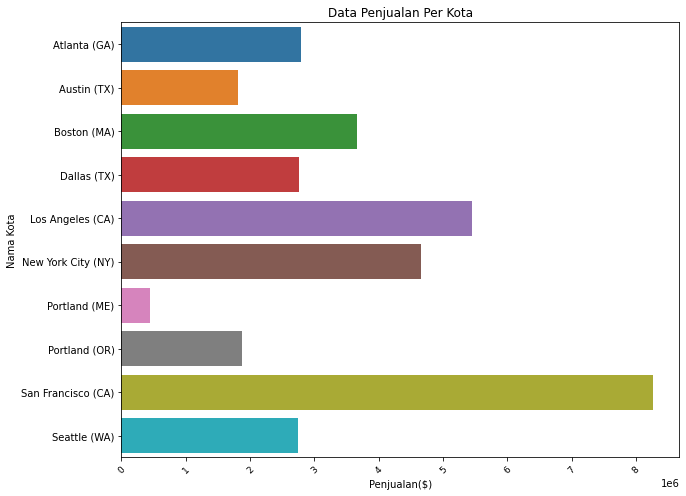

In [15]:
data_city_sales = pd.DataFrame(data.groupby('City').sum()['Sales'].reset_index())
plt.figure(figsize=(10,8))
sns.barplot(x='Sales',y='City',data=data_city_sales)
plt.xticks(rotation=45,size=9)
plt.xlabel('Penjualan($)')
plt.ylabel('Nama Kota')
plt.title('Data Penjualan Per Kota')
plt.show()

Pertanyaan 3 : Jam berapa kita harus menampilkan iklan untuk memaksimalkan kemungkinan pelanggan membeli produk?

Menambahkan Kolom Hour

In [16]:
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour
data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   

               City   Sales  Hour  
0       Dallas (TX)   23.90     8  
2       Boston (MA)   99.99    22  
3  Los Angeles (CA)  600.00    14  
4  Los Angeles (CA)   11.99    14  
5  Los Angeles (CA)   11.99     9

In [17]:
data_jam_penjualan = pd.DataFrame(data.groupby('Hour').count()['Order ID'].reset_index())
data_jam_penjualan.rename(columns={'Order ID':'Banyak Penjualan'},inplace=True)
data_jam_penjualan

Hour  Banyak Penjualan
0      0              3910
1      1              2350
2      2              1243
3      3               831
4      4               854
5      5              1321
6      6              2482
7      7              4011
8      8              6256
9      9              8748
10    10             10944
11    11             12411
12    12             12587
13    13             12129
14    14             10984
15    15             10175
16    16             10384
17    17             10899
18    18             12280
19    19             12905
20    20             12228
21    21             10921
22    22              8822
23    23              6275

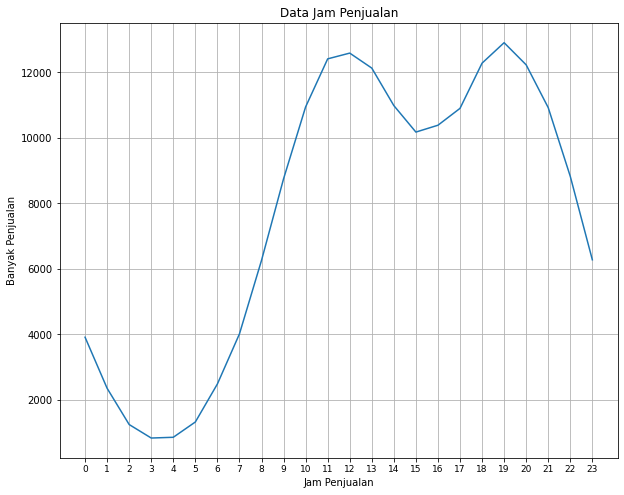

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Hour',y='Banyak Penjualan',data=data_jam_penjualan)
plt.xticks(data_jam_penjualan['Hour'],rotation='horizontal',size=9)
plt.xlabel('Jam Penjualan')
plt.ylabel('Banyak Penjualan')
plt.title('Data Jam Penjualan')
plt.grid()
plt.show()

Rekomendasi Jam Pemasangan iklan adalah antara jam 11:00 atau jam 19:00

Pertanyaan 4 : Produk apa yang paling banyak terjual? Menurut Anda mengapa itu paling banyak terjual?


In [21]:
data_penjualan_produk = pd.DataFrame(data.groupby('Product').sum()['Quantity Ordered'].reset_index())
data_penjualan_produk

Product  Quantity Ordered
0                 20in Monitor              4129
1       27in 4K Gaming Monitor              6244
2             27in FHD Monitor              7550
3       34in Ultrawide Monitor              6199
4        AA Batteries (4-pack)             27635
5       AAA Batteries (4-pack)             31017
6     Apple Airpods Headphones             15661
7   Bose SoundSport Headphones             13457
8                Flatscreen TV              4819
9                 Google Phone              5532
10                    LG Dryer               646
11          LG Washing Machine               666
12    Lightning Charging Cable             23217
13          Macbook Pro Laptop              4728
14             ThinkPad Laptop              4130
15        USB-C Charging Cable             23975
16             Vareebadd Phone              2068
17            Wired Headphones             20557
18                      iPhone              6849

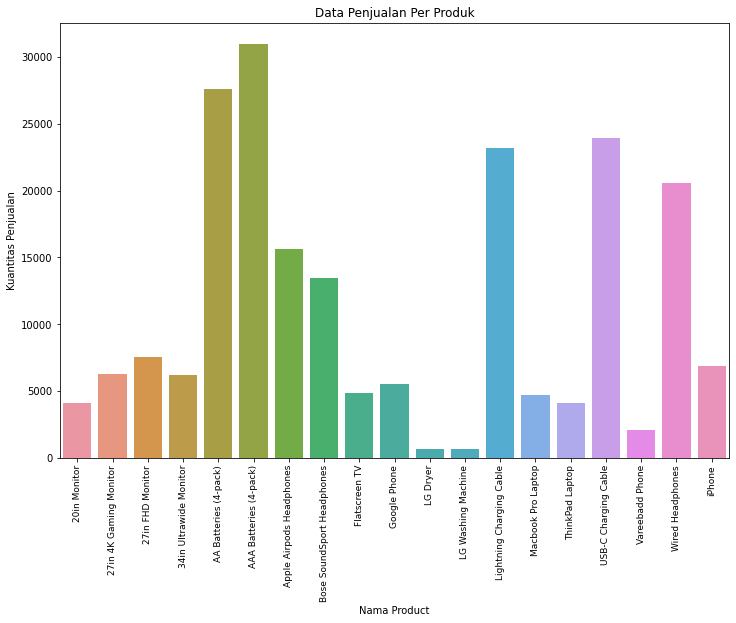

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product',y='Quantity Ordered',data=data_penjualan_produk)
plt.xticks(rotation='vertical',size=9)
plt.xlabel('Nama Product')
plt.ylabel('Kuantitas Penjualan')
plt.title('Data Penjualan Per Produk')
plt.show()

In [23]:
data_harga_ratarata_product = pd.DataFrame(data.groupby('Product').mean()['Price Each'].reset_index())
data_harga_ratarata_product

Product  Price Each
0                 20in Monitor      109.99
1       27in 4K Gaming Monitor      389.99
2             27in FHD Monitor      149.99
3       34in Ultrawide Monitor      379.99
4        AA Batteries (4-pack)        3.84
5       AAA Batteries (4-pack)        2.99
6     Apple Airpods Headphones      150.00
7   Bose SoundSport Headphones       99.99
8                Flatscreen TV      300.00
9                 Google Phone      600.00
10                    LG Dryer      600.00
11          LG Washing Machine      600.00
12    Lightning Charging Cable       14.95
13          Macbook Pro Laptop     1700.00
14             ThinkPad Laptop      999.99
15        USB-C Charging Cable       11.95
16             Vareebadd Phone      400.00
17            Wired Headphones       11.99
18                      iPhone      700.00

In [24]:
fig, ax = plt.subplots(figsize=(14,7))
ax2 = ax.twinx()
ax.bar(data_penjualan_produk['Product'],data_penjualan_produk['Quantity Ordered'],color='g')
ax2.plot(data_penjualan_produk['Product'],data_harga_ratarata_product['Price Each'],color='b',label='Harga Rata-Rata')
ax.set_xlabel('Nama Produk')
ax.set_ylabel('Kuantitas Penjualan')
ax2.set_ylabel('Harga Rata-rata ($)')
ax.set_xticklabels(data_penjualan_produk['Product'],rotation='vertical',size=9)
plt.title('Data Korelasi Antara Banyak Penjualan dan Harga Rata-rata')
plt.legend()
plt.show()

/tmp/ipykernel_5265/3765579372.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_penjualan_produk['Product'],rotation='vertical',size=9)
